In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
data = pd.read_csv('/Users/weronikakahan/PycharmProjects/Evolutionary-Algorithms-project/ela_features_with_classes.csv')

In [106]:
data = data.drop(columns=['Unnamed: 0'])

In [107]:
data

,function_class,int,lr2,max,eps_ratio,disp,nbc
0,separable - separable,335.919376,0.738794,7.837768,0.605606,0.781591,-0.483870
1,separable - separable,707.810619,0.837691,8.214469,0.705706,0.803693,-0.457983
2,separable - separable,42.724733,0.804055,8.414653,0.685686,0.789202,-0.475196
3,separable - separable,124.281372,0.784066,8.046171,0.645646,0.795811,-0.479525
4,separable - separable,213.391765,0.692768,6.811131,0.565566,0.777463,-0.505878
...,...,...,...,...,...,...,...
1195,moderate - multi-modal,697.042360,0.123601,4.934662,0.965966,0.787379,-0.577647
1196,moderate - multi-modal,-193.536965,0.137761,5.472417,1.006006,0.789442,-0.593229
1197,moderate - multi-modal,719.922797,0.135642,5.410031,1.006006,0.814364,-0.589027
1198,moderate - multi-modal,874.140235,0.105563,5.005434,1.006006,0.818904,-0.614149


In [108]:
data['function_class'].value_counts()

function_class
separable - moderate             200
separable - ill-conditioned      200
separable - multi-modal          200
separable - weakly-structured    200
separable - separable            150
moderate - moderate              100
moderate - ill-conditioned       100
moderate - multi-modal            50
Name: count, dtype: int64

In [109]:
data.isna().sum()

function_class    0
int               0
lr2               0
max               0
eps_ratio         0
disp              0
nbc               0
dtype: int64

In [110]:
X = data.drop(columns=['function_class'])
y = data['function_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

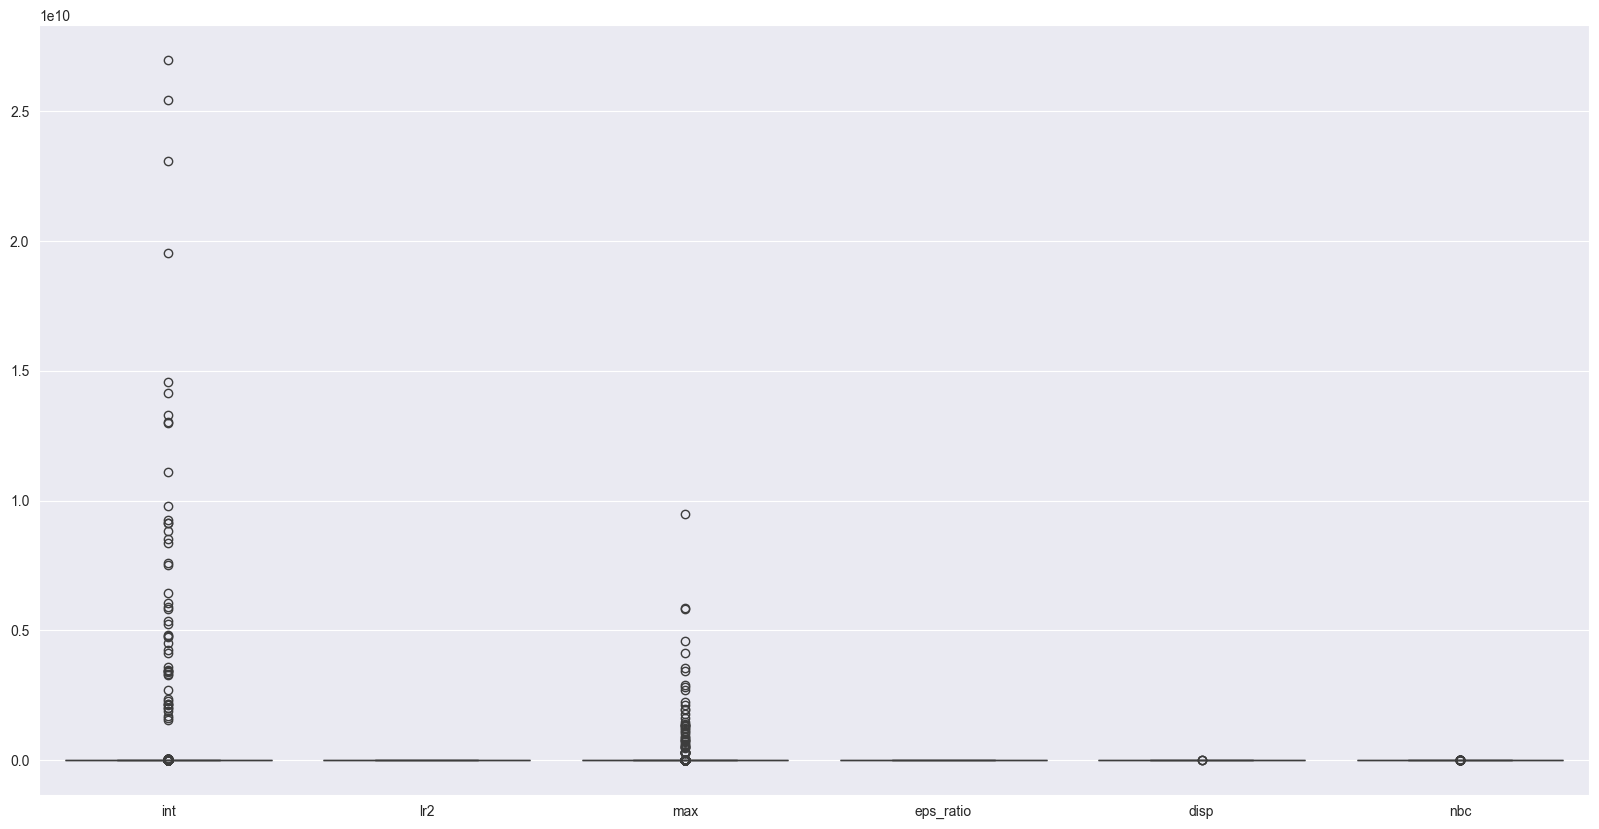

In [111]:
#check data distubution in different columns to identify outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=X)

to discuss if we should remove those outstanding values

In [112]:
#scaling data for some models
scaler = StandardScaler()

In [113]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
X_train_scaled

array([[-0.17214778,  1.14433793, -0.14310572, -0.12676396,  0.46315488,
        -0.01017984],
       [-0.17190673, -1.24457276, -0.14308939,  0.75915757, -1.18820508,
        -0.52102459],
       [-0.16036549,  0.23251216, -0.13708201,  1.4678948 ,  0.41901504,
         0.23365001],
       ...,
       [-0.17214952, -1.32558878, -0.14310619, -1.02073933,  2.15813874,
        -0.54233595],
       [-0.17214924, -0.39233339, -0.14310615, -0.5616709 , -0.11614577,
         1.18607024],
       [-0.17214948, -1.3403726 , -0.14310619, -1.02879316,  2.04657288,
        -0.82091372]])

In [115]:
X_test_scaled

array([[-0.17214901, -0.96256763, -0.14310618, -0.51334791, -0.74216171,
        -1.52250066],
       [-0.17214912,  0.23765069, -0.14310605, -0.43280958,  0.35527141,
         1.75308166],
       [-0.17214715,  0.88555986, -0.14310471, -0.02206414, -0.59279958,
         0.54574283],
       ...,
       [-0.16594561, -0.5474495 , -0.14083913,  1.42762564,  1.95086767,
         1.18969165],
       [-0.17214885, -0.94242148, -0.14310618, -0.50529407, -0.904893  ,
        -1.46236905],
       [-0.17214954, -0.24935334, -0.14310614, -0.52945557,  0.14644338,
         1.0230909 ]])

In [116]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [117]:
def evaluate_model(model, model_name):
    """ Helper function to evaluate the model and store results """
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    return [model_name, accuracy, precision, recall, f1]

Random Forest

In [118]:
rf = RandomForestClassifier()
results_rf = evaluate_model(rf, 'Random Forest')
results_df.loc[0] = results_rf

In [119]:
results_df.loc[0] = results_rf

Support Vector Machine

In [120]:
svm = SVC()
results_svm = evaluate_model(svm, 'Support Vector Machine')

In [121]:
results_df.loc[1] = results_svm

K-Nearest Neighbors

In [122]:
#choose the best number of neighbors
neighbors = range(1, 10)
accuracy = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, preds))

In [123]:
accuracy

[0.95,
 0.9375,
 0.95,
 0.95,
 0.9541666666666667,
 0.95,
 0.95,
 0.95,
 0.9583333333333334]

In [124]:
knn = KNeighborsClassifier()
results_knn= evaluate_model(knn, 'K-Nearest Neighbors')

In [125]:
results_df.loc[2] = results_knn

Gradient Boosting

In [126]:
gb = GradientBoostingClassifier()
results_gb = evaluate_model(gb, 'Gradient Boosting')

In [127]:
results_df.loc[3] = results_gb

Neural Network (MLP Classifier)

In [128]:
#TODO: MLP does not converge, need to tune hyperparameters

In [129]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.975000,0.975386,0.975000,0.974948
1,Support Vector Machine,0.854167,0.868770,0.854167,0.856320
2,K-Nearest Neighbors,0.954167,0.955471,0.954167,0.954043
3,Gradient Boosting,0.966667,0.967180,0.966667,0.966542
